In [1]:
%load_ext autoreload
%autoreload 2

In [5]:
import sys

sys.path.append('../src')
from icgem import download_ggm, read_icgem
import pandas as pd
import numpy as np

In [3]:
model = 'GO_CONS_GCF_2_TIM_R6e'
# model = 'XGM2019e_2159'
download_ggm(model_name=model)

model = 'downloads/' + model

Cannot verify completeness of GO_CONS_GCF_2_TIM_R6e.gfc due to connectivity issues. Using the existing file.



Read GGM

In [4]:
model = model + '.gfc'
shc = read_icgem(model)

In [5]:
for key, value in shc.items():
    if 'Cnm' in key or 'Snm' in key:
        continue
    print(f'{key:10}', value)

a          6378136.46
nmax       300
GM         398600441500000.0
tide_sys   zero_tide


In [33]:
df = pd.DataFrame(
    {
        'lon': np.array([1, 2, 3, 4, 5, 6]),
        'lat': np.array([1, 2, 3, 4, 5, 6]),
        'elev': np.array([1, 2, 3, 4, 5, 6]),
        'grav': np.array([1, 2, 3, 4, 5, 6]),
    }
)
df

,lon,lat,elev1,gravity
0,1,1,1,1
1,2,2,2,2
2,3,3,3,3
3,4,4,4,4
4,5,5,5,5
5,6,6,6,6


In [27]:
lon_column = [col for col in df.columns if pd.Series(col).str.contains('lon', case=False).any()][0]
lon_column

'lon'

In [34]:
elev_column = [col for col in df.columns if pd.Series(col).str.contains('elev', case=False).any()][0]
elev_column

'elev1'

In [32]:
grav_column = [col for col in df.columns if pd.Series(col).str.contains('grav', case=False).any()][0]
grav_column

'gravity'

In [ ]:
lat_column = [col for col in df.columns if pd.Series(col).str.contains('lat', case=False).any()][0]
lat_column

In [23]:
arr = np.array([1, 2, 3, 4, 5, 6])

isinstance(arr, np.ndarray)

True

In [24]:
isinstance(df, pd.DataFrame)

True

In [6]:
# Generate synthetic data
np.random.seed(42)  # For reproducibility
num_points = 100
lon = np.random.uniform(120, 130, num_points)  # Longitudes between 120 and 130 degrees
lat = np.random.uniform(20, 30, num_points)    # Latitudes between 20 and 30 degrees
free_air_anomaly = np.random.uniform(-50, 50, num_points)  # Free-air anomalies between -50 and 50 mGal
bouguer_anomaly = np.random.uniform(-100, 100, num_points) # Bouguer anomalies between -100 and 100 mGal

data = pd.DataFrame({
    'lon': lon,
    'lat': lat,
    'free_air': free_air_anomaly,
    'bouguer': bouguer_anomaly
})

In [34]:
gravity_data = pd.read_excel('MeanTideGravity.xlsx')

In [27]:
gravity_data = pd.DataFrame({
    'lon': lon,
    'lat': lat,
    'gravity': free_air_anomaly,
    'elevation': bouguer_anomaly
})

In [3]:
from plot import plot_gravity_anomaly

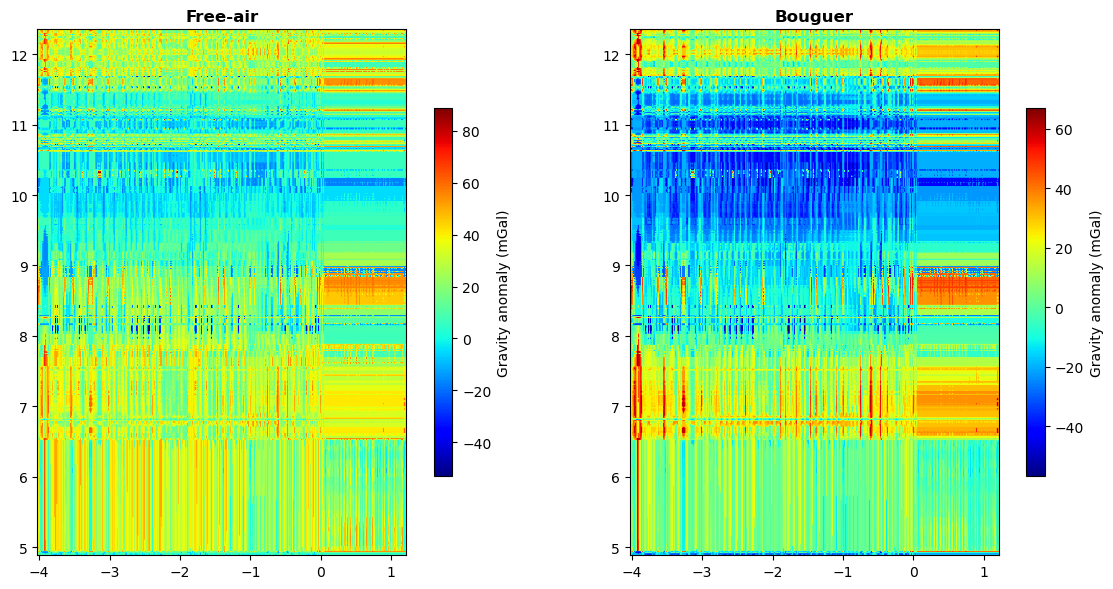

In [38]:
plot_gravity_anomaly(gravity_data=gravity_data, colormap='jet', which='both', save=False)

In [37]:
elev_column = [col for col in gravity_data.columns if pd.Series(col).str.contains('height', case=False).any()][0]
elev_column

'Height'

In [36]:
gravity_data.columns

Index(['Longitude', 'Latitude', 'Height', 'Gravity'], dtype='object')